# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd
df=pd.read_excel("GermanCredit.xlsx")
df.head(5)

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [2]:
df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

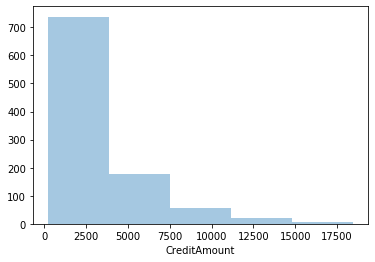

In [4]:
sns.distplot(df['CreditAmount'],kde=False,bins=5)
plt.show()

# 3b. Create creditability dataframe

In [5]:
df0=df[df['Creditability']==0]
df1=df[df['Creditability']==1]
df0.head(5)

,Creditability,CreditAmount,DurationOfCreditInMonths
22,0,2384,36
45,0,1216,18
47,0,1864,18
97,0,4455,36
110,0,3959,15


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [6]:
data=pd.concat([df0,df1],axis=0)
data

,Creditability,CreditAmount,DurationOfCreditInMonths
22,0,2384,36
45,0,1216,18
47,0,1864,18
97,0,4455,36
110,0,3959,15
...,...,...,...
746,1,2760,24
747,1,5507,24
748,1,1199,9
749,1,2892,24


In [7]:
data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

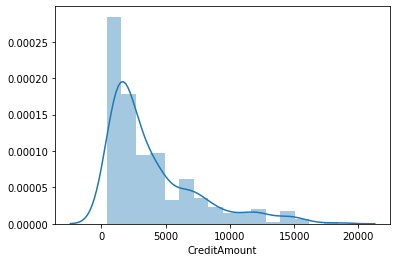

In [8]:
sns.distplot(df0['CreditAmount'])

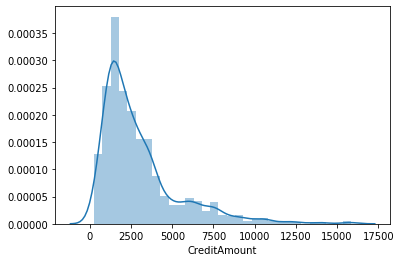

In [9]:
sns.distplot(df1['CreditAmount'])

# 6. Prepare input data for the model

In [10]:
x=df.drop('Creditability',axis=1)
y=df['Creditability']

In [11]:
#scaling
x_sc=x-x.mean()
x_sc.head(5)

,CreditAmount,DurationOfCreditInMonths
0,-2222.248,-2.903
1,-472.248,-11.903
2,-2430.248,-8.903
3,-1149.248,-8.903
4,-1100.248,-8.903


# 7. Fit logistic regression model

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1500,random_state=0)
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

# 8. Test accuracy calculation

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,roc_auc_score,roc_curve,classification_report

In [15]:
accuracy_score(ytest,ypred)

0.6733333333333333

# 9. Build a confusion matrix

In [16]:
cm=confusion_matrix(ytest,ypred)
cm

array([[  9,  91],
       [  7, 193]])

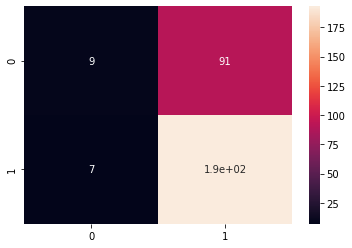

In [17]:
sns.heatmap(cm,annot=True)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [18]:
yprob=lr.predict_proba(xtest)
yprob0=yprob[:,0]
yprob1=yprob[:,1]

In [19]:
from scipy import stats

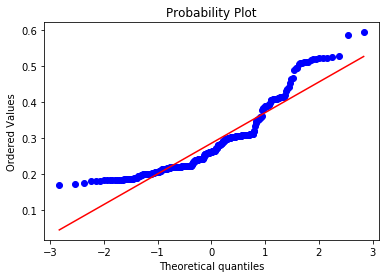

In [20]:
stats.probplot(yprob0,plot=plt)
plt.show()

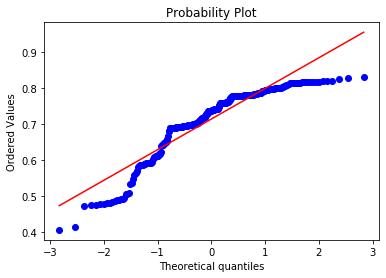

In [21]:
stats.probplot(yprob1,plot=plt)
plt.show()